## Basic Level BMI Calculator

In [1]:
# Beginner BMI Calculator

def calculate_bmi(weight, height):
    """Calculate BMI given weight in kg and height in meters."""
    bmi = weight / (height ** 2)
    return bmi

def classify_bmi(bmi):
    """Classify BMI into categories."""
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal weight"
    elif 25.0 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obesity"

def bmi_calculator():
    """Run a simple command-line BMI calculator."""
    try:
        weight = float(input("Enter your weight in kg: "))
        height = float(input("Enter your height in meters: "))
        
        if weight <= 0 or height <= 0:
            print("Weight and height must be positive values!")
            return
        
        bmi = calculate_bmi(weight, height)
        category = classify_bmi(bmi)
        
        print(f"Your BMI is: {bmi:.2f}")
        print(f"BMI Category: {category}")
    
    except ValueError:
        print("Invalid input. Please enter numeric values.")

# Run the beginner BMI calculator
bmi_calculator()


Enter your weight in kg:  55
Enter your height in meters:  1.5


Your BMI is: 24.44
BMI Category: Normal weight


## Advanced Level BMI Calculator

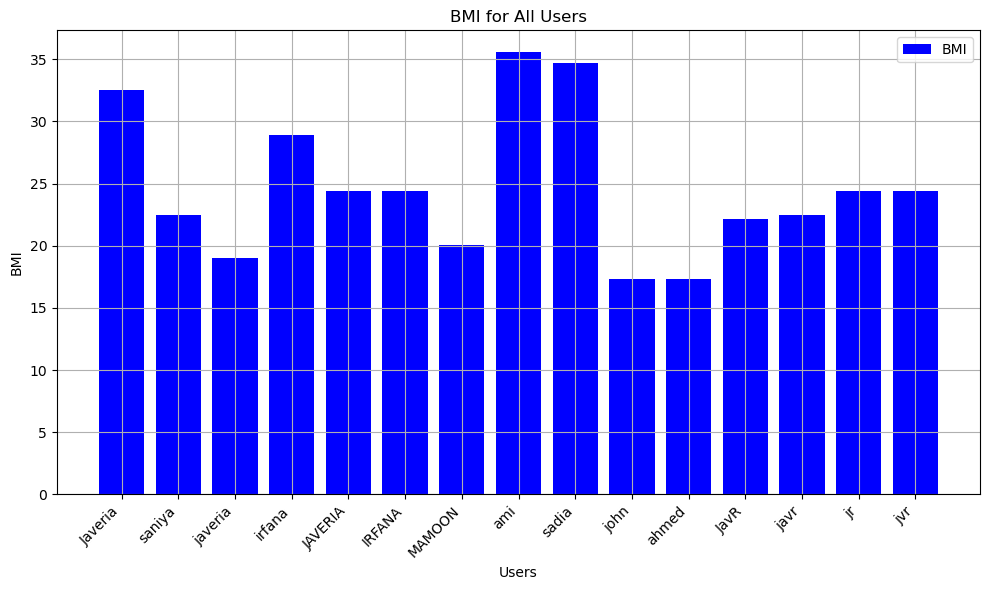

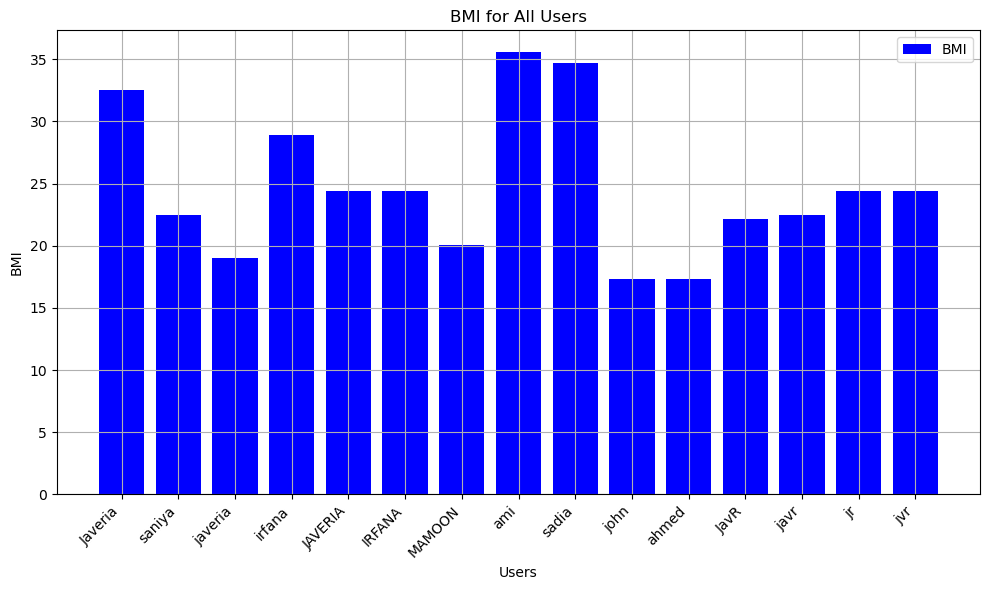

In [ ]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
import csv
import os

# File to store data
DATA_FILE = "bmi_data.csv"

class BMICalculator:
    def __init__(self, root):
        self.root = root
        self.root.title("BMI Calculator")

        # Create UI elements
        self.label_name = tk.Label(root, text="Enter name:")
        self.label_name.grid(row=0, column=0)

        self.entry_name = tk.Entry(root)
        self.entry_name.grid(row=0, column=1)

        self.label_weight = tk.Label(root, text="Enter weight (kg):")
        self.label_weight.grid(row=1, column=0)

        self.entry_weight = tk.Entry(root)
        self.entry_weight.grid(row=1, column=1)

        self.label_height = tk.Label(root, text="Enter height (m):")
        self.label_height.grid(row=2, column=0)

        self.entry_height = tk.Entry(root)
        self.entry_height.grid(row=2, column=1)

        self.calculate_button = tk.Button(root, text="Calculate BMI", command=self.calculate_bmi)
        self.calculate_button.grid(row=3, column=0, columnspan=2)

        self.view_history_button = tk.Button(root, text="View BMI History", command=self.view_history)
        self.view_history_button.grid(row=4, column=0, columnspan=2)

        self.result_label = tk.Label(root, text="Your BMI will appear here.")
        self.result_label.grid(row=5, column=0, columnspan=2)

        self.history = []  # Store tuples of (name, bmi)

        # Load existing data
        self.load_data()

    def load_data(self):
        """Load existing BMI data from the file."""
        if os.path.exists(DATA_FILE):
            with open(DATA_FILE, 'r') as file:
                reader = csv.reader(file)
                self.history = [(row[0], float(row[1])) for row in reader]

    def save_data(self, name, bmi):
        """Save new BMI data to the file."""
        with open(DATA_FILE, 'a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([name, bmi])

    def calculate_bmi(self):
        try:
            name = self.entry_name.get().strip()
            weight = float(self.entry_weight.get())
            height = float(self.entry_height.get())

            if not name:
                raise ValueError("Name cannot be empty.")
            if weight <= 0 or height <= 0:
                raise ValueError("Invalid input. Weight and height must be positive numbers.")

            bmi = weight / (height ** 2)
            category = self.classify_bmi(bmi)

            result_text = f"{name}, your BMI: {bmi:.2f} ({category})"
            self.result_label.config(text=result_text)

            # Store the result in history and file
            self.history.append((name, bmi))
            self.save_data(name, bmi)

            # Plot BMI trend for all historical entries
            self.plot_bmi_trend()

        except ValueError as e:
            messagebox.showerror("Input Error", str(e))

    def classify_bmi(self, bmi):
        """Classify BMI into categories."""
        if bmi < 18.5:
            return "Underweight"
        elif 18.5 <= bmi < 24.9:
            return "Normal weight"
        elif 25.0 <= bmi < 29.9:
            return "Overweight"
        else:
            return "Obesity"

    def plot_bmi_trend(self):
        """Plot BMI trend for all historical entries using a bar graph."""
        if len(self.history) > 1:
            names = [entry[0] for entry in self.history]
            bmis = [entry[1] for entry in self.history]

            plt.figure(figsize=(10, 6))  # Set the figure size for better readability
            plt.bar(names, bmis, color='blue', label='BMI')

            plt.title('BMI for All Users')
            plt.xlabel('Users')
            plt.ylabel('BMI')
            plt.grid(True)

            plt.xticks(rotation=45, ha="right")  # Rotate names for readability
            plt.tight_layout()  # Adjust layout to prevent overlapping
            plt.legend()

            plt.show()

    def view_history(self):
        """View BMI history for all users with an option to visualize data."""
        history_window = tk.Toplevel(self.root)
        history_window.title("BMI History")

        text_box = tk.Text(history_window)
        text_box.pack()

        for name, bmi in self.history:
            text_box.insert(tk.END, f"Name: {name}, BMI: {bmi:.2f}\n")

        # Add button to plot all users' BMI trend
        plot_button = tk.Button(history_window, text="Visualize BMI History", command=self.plot_bmi_trend)
        plot_button.pack()


# Create the root window for the advanced BMI calculator
root = tk.Tk()
bmi_calculator = BMICalculator(root)
root.mainloop()
